In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
with open("articles.json", "r") as f:
    articles = json.load(f)

In [4]:
articles

[{'article_url': 'https://www.heise.de/news/Telekom-und-Apple-starten-Augmented-Reality-Innovationsprogramm-6147126.html',
  'number_comments': 0,
  'date': '07-26-2021, 16:01',
  'brandig': ['Mac & i'],
  'related_topics': ['5G',
   'Apple',
   'Augmented Reality',
   'Deutsche Telekom',
   'Innovation',
   'iOS',
   'iPhone',
   'Mobilfunk',
   'Startups',
   'Wettbewerb'],
  'authors': ['Ben Schwan'],
  'heading': 'Telekom und Apple starten Augmented-Reality-Innovationsprogramm',
  'lead': 'Im Rahmen des Start-up-Inkubators "Hubraum" können sich Entwickler in sechs Kategorien bewerben, um Apples AR-Technik mit 5G und Co. zu kombinieren.',
  'atricle_text': 'Die Deutsche Telekom AG hat zusammen mit ihrer US-Tochter T-Mobile sowie Apple ein Innovationsprogramm für Augmented Reality (AR) aufgelegt. Die Kampagne läuft im Rahmen des Telekom-Inkubators Hubraum mit Sitz in Deutschland und ist international angelegt. Bewerbungen sind noch bis zum 4. August möglich, danach wird es für die in

# Seperate Analyse jedes heruntergeladenen Feldes

## number_comments

In [5]:
number_comments_list = [article["number_comments"] for article in articles]
number_comments_np = np.array(number_comments_list)

### Verteilung

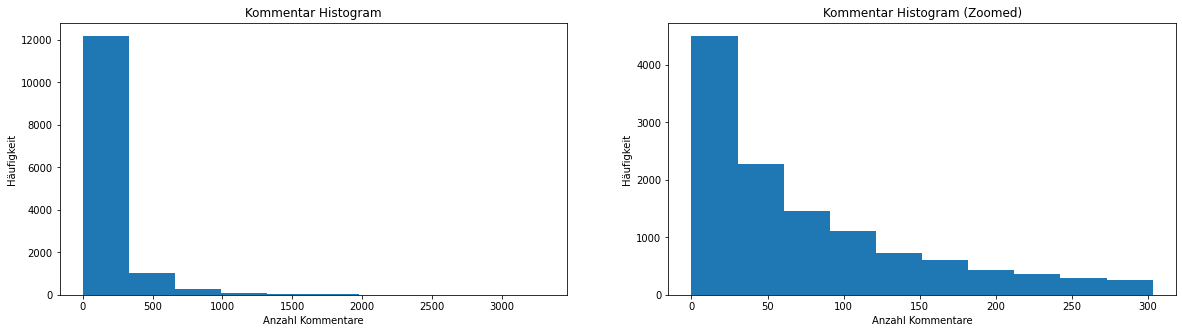

In [9]:
f = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.hist(number_comments_np)
plt.xlabel('Anzahl Kommentare')
plt.ylabel('Häufigkeit')
plt.title('Kommentar Histogram')
plt.subplot(1, 2, 2)
plt.hist(np.sort(number_comments_np)[:12000])
plt.xlabel('Anzahl Kommentare')
plt.ylabel('Häufigkeit')
plt.title('Kommentar Histogram (Zoomed)')
plt.show(f)

In [23]:
np.mean(number_comments_np)

134.31538405106008

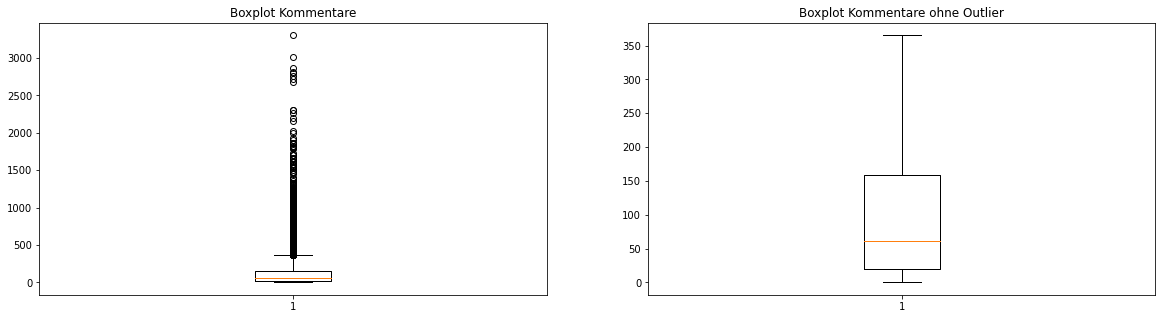

In [28]:
f = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.boxplot(number_comments_np)
plt.title('Boxplot Kommentare')
plt.subplot(1, 2, 2)
plt.boxplot(number_comments_np,showfliers=False)
plt.title('Boxplot Kommentare ohne Outlier')
plt.show(f)

### Meist diskutierte Artikel 🚗

In [21]:
for idx in reversed(np.argsort(number_comments_np)[-5:]):
    print(f"Anzahl Kommentare {articles[idx]['number_comments']}")
    print(f"Überschrift \"{articles[idx]['heading']}\"")
    print(f"Datum {articles[idx]['date']}")
    print()

Anzahl Kommentare 3302
Überschrift "Bundestag lehnt Tempolimit 130 auf Autobahnen und Nulltarif im ÖPNV ab"
Datum 10-18-2019, 07:34

Anzahl Kommentare 3007
Überschrift "Tempolimit: Verbände fordern Tempolimit auf Autobahnen und Tempo 30 innerorts"
Datum 02-12-2020, 14:06

Anzahl Kommentare 2870
Überschrift "Kommentar: Tempolimit "gegen jeden Menschenverstand"? So, so ..."
Datum 01-25-2019, 06:20

Anzahl Kommentare 2813
Überschrift "Kommentar: Der Mercedes EQC ist eine rollende Provokation"
Datum 09-07-2018, 07:16

Anzahl Kommentare 2803
Überschrift "BMW: Europäer wollen keine Elektroautos kaufen"
Datum 06-29-2019, 18:20



### Artikel ohne Kommentare

In [11]:
np.count_nonzero(number_comments_np==0)

457